# Velocity figure
This figure is used to show the differences in the timing of the sea ice response. Commonality - 

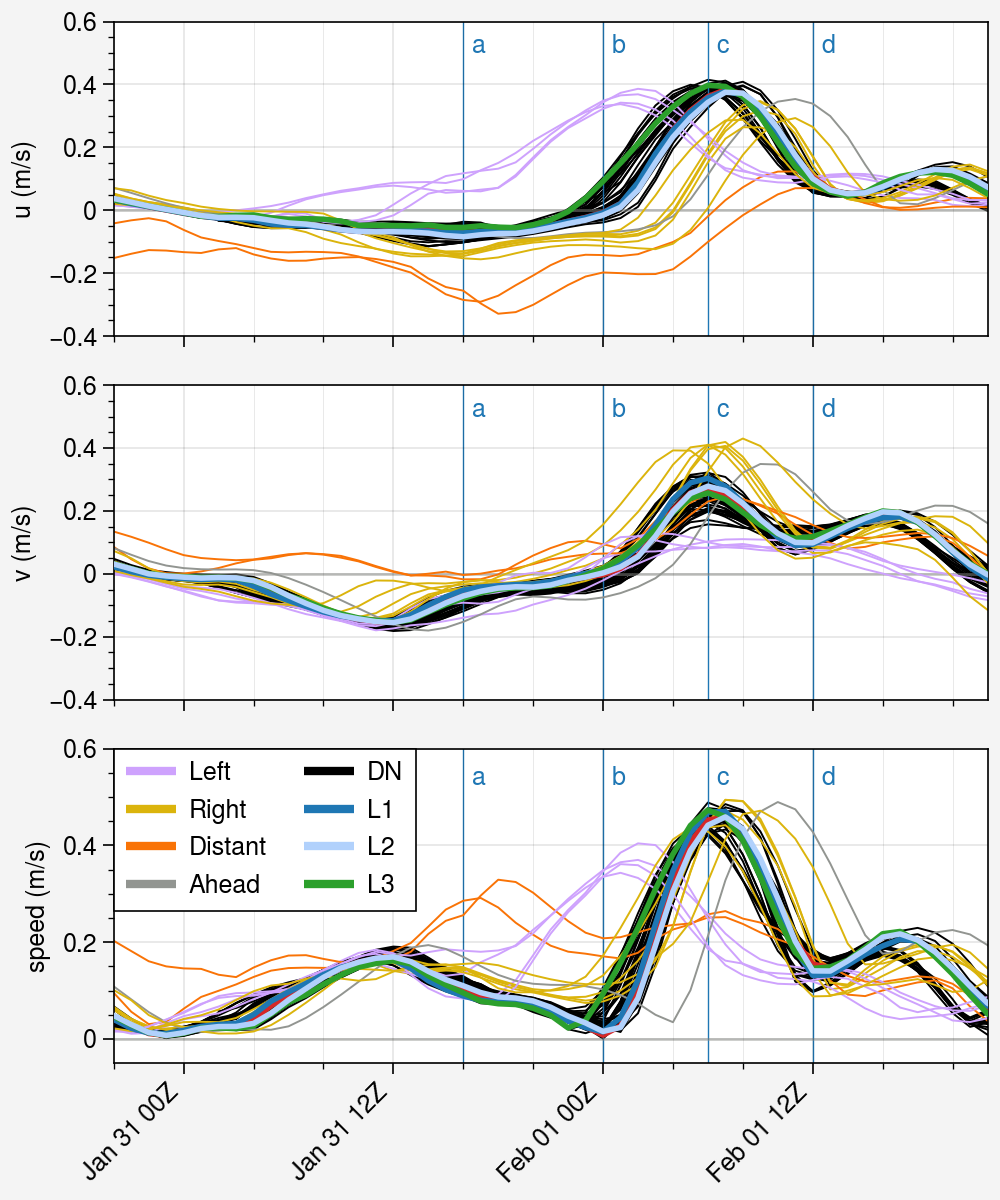

In [ ]:
%run ../scripts/plot_velocity_time_series.py

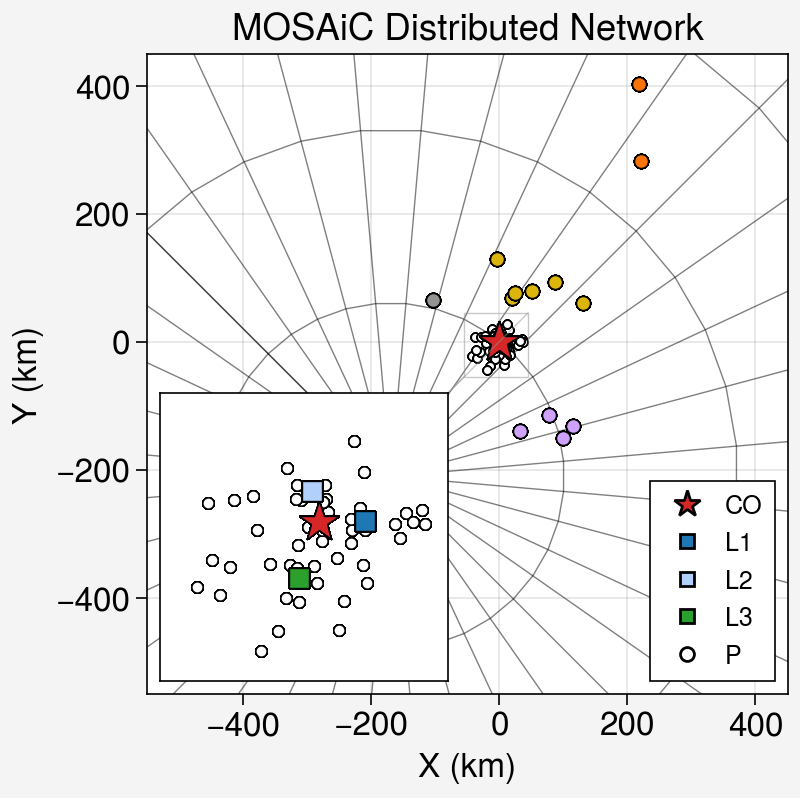

In [2]:
%run '../scripts/plot_maps.py'

In [120]:
polygons = {'Left 1': ['2019P184', '2019P127', '2019P182', '2019P128'],
            'Left 2': ['2019P184', '2019P124', '2019O6', '2019P127'],
            'Left 3': ['2019O1', '2019P127','2019O6'],
            'DN_set_1': ['2019P124', '2019P125', '2019P102', '2019P198'],
            'DN_set_2': ['2019P90', '2019P91', '2019P193', '2019P196'],
            'DN_set_3': ['2019P136', '2019P187', '2019P92', '2019P103'],
            'DN_set_4': ['2019P191', '2019P148', '2019P139', '2019P195'],
            'DN_set_5': ['2019P143', '2019P203', '2019T69', '2019P105'],
            'l_sites': [ '2019T65', '2019T67', '2019S94'],
            'Full DN': ['2019O5', '2019P91', '2019P187', '2019P191', '2019P148', '2019P124'],
            'North group': ['2019P22', '2019P91', '2019P187'],
            'Right group 1': ['2019P123', '2019P112', '2019P187'],
            'Right group 2': ['2019P114', '2019P113', '2019P155'],
            'Right group 3': ['2019P113', '2019P92', '2019P137', '2019P119'],
            'Distant group': ['2019P123', '2019P157', '2019P156', '2019P155'],
            'Very large group': ['2019P22', '2019P123', '2019P157', '2019P156',
                                 '2019P155', '2019P182', '2019P128', '2019P184',
                                 '2019P124']}
# Add L-sites

colors = {'Left 1': 'lilac',
          'Left 2': 'purple',
          'Left 3': 'maroon',
          'DN_set_1': 'k',
          'DN_set_2': 'k',
          'DN_set_3': 'k',
          'DN_set_4': 'k',
          'DN_set_5': 'k',
          'l_sites': 'tab:orange',
          'Full DN': 'tab:blue',
          'North group': 'green',
          'Right group 1': 'goldenrod',
          'Right group 2': 'gold',
          'Right group 3': 'yellow',
          'Distant group': 'orange',
          'Very large group': 'forest green'}

lstyles = {'DN_set_1': '-',
           'DN_set_2': '--',
           'DN_set_3': '-.',
           'DN_set_4': ':',
           'DN_set_5': '-'}

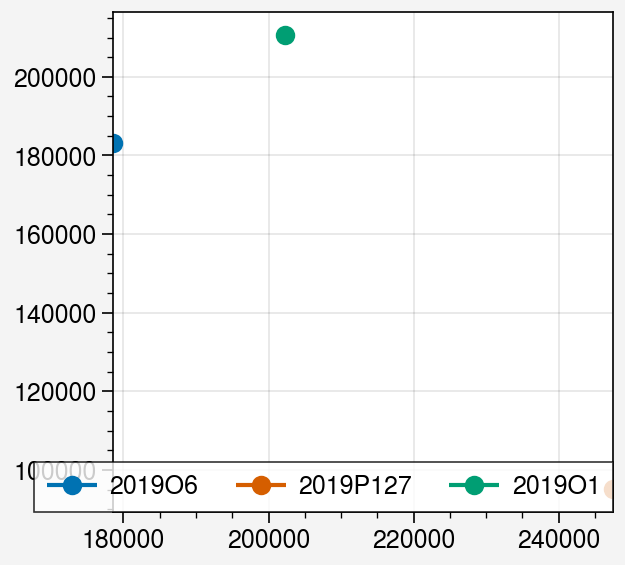

In [119]:
fig, ax = pplt.subplots()
for buoy in polygons['Left 3']:
    ax.plot(buoy_data[buoy].loc[date, 'x'],
            buoy_data[buoy].loc[date, 'y'], marker='o', label=buoy)
ax.legend()

In [55]:
s_track = pd.read_csv('../data/storm_track.csv', index_col=0, parse_dates=True)
s_track = s_track.loc[slice('2020-01-31 12:00', '2020-02-02 00:00')]

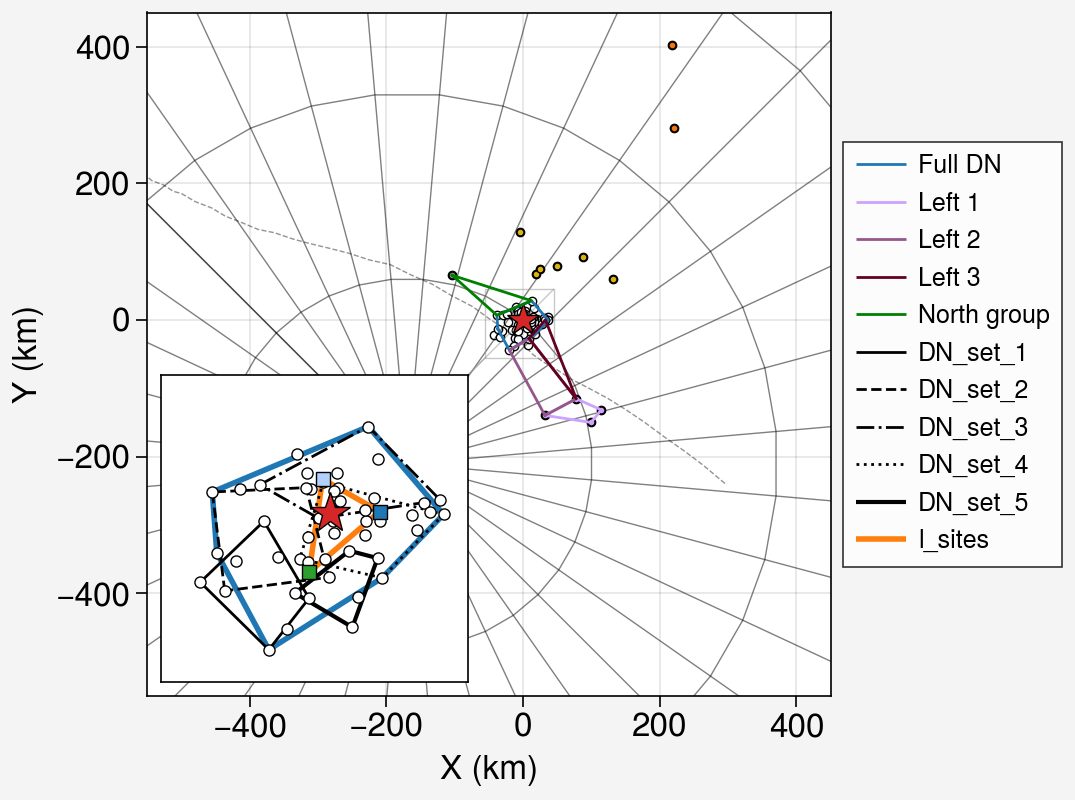

In [97]:
###### Maps ########
pol_stere_proj = 'epsg:3413'
npstere_crs = pyproj.CRS(pol_stere_proj)
source_crs = pyproj.CRS("epsg:4326") # Global lat-lon coordinate system
latlon_to_polar = pyproj.Transformer.from_crs(source_crs, npstere_crs, always_xy=True)
for buoy in buoy_data:
    x, y = latlon_to_polar.transform(buoy_data[buoy].longitude, buoy_data[buoy].latitude)
    buoy_data[buoy]['x_stere'] = x
    buoy_data[buoy]['y_stere'] = y

fig, ax0 = pplt.subplots(ncols=1, height=4, share=False)
date = '2020-02-01 00:00'
all_buoys = [b for b in buoy_data if date in buoy_data[b].index]

df_x = pd.DataFrame({buoy: buoy_data[buoy].loc[:, 'x_stere'] for buoy in all_buoys})/1e3
df_y = pd.DataFrame({buoy: buoy_data[buoy].loc[:, 'y_stere'] for buoy in all_buoys})/1e3
x0 = df_x.loc[date, '2019T66']
y0 = df_y.loc[date, '2019T66']
df_x -= x0
df_y -= y0


#### Lat/lon lines ####
from scipy.interpolate import interp1d

crs0 = pyproj.CRS('WGS84')
crs1 = pyproj.CRS('epsg:3413')
transformer_ll = pyproj.Transformer.from_crs(crs0, crs_to=crs1, always_xy=True)
transformer_xy = pyproj.Transformer.from_crs(crs1, crs_to=crs0, always_xy=True)

lats = np.arange(75, 91, 2.5)
lons = np.arange(-180, 181, 10)
lons, lats = np.meshgrid(lons, lats)
xylon, xylat = transformer_ll.transform(lons, lats)
xylon = xylon * 1e-3
xylat = xylat * 1e-3

# x0 = 0.4e6
# y0 = -1.1e6
lat_labels = []
lat_y = []
lon_labels = []
lon_x = []

for idx in range(0, xylon.shape[0]):
    if np.any(xylon[idx,:] < x0) & np.any(xylon[idx,:] > x0):
        y = interp1d(xylon[idx,:], xylat[idx,:])(x0)
        lat_y.append(y)
        lat_labels.append(lats[idx,0])
for idx in range(0, xylon.shape[1]):
    if np.any(xylat[:,idx] < y0) & np.any(xylat[:,idx] > y0):
        if np.any(xylon[:,idx] < x0) & np.any(xylon[:,idx] > x0):            
            x = interp1d(xylat[:,idx], xylon[:,idx])(y0)
            lon_x.append(x)
            lon_labels.append(lons[0,idx])
            
lat_y = list(np.array(lat_y))
lat_labels = [str(x) + '$^\circ$' for x in lat_labels]
lon_labels = [str(x) + '$^\circ$' for x in lon_labels]
lon_x = list(np.array(lon_x))
####

dn_buoys = [b for b in all_buoys if b not in left + right + distant]
for idx in range(xylon.shape[1]):
    ax0.plot(xylon[:,idx] - x0, xylat[:,idx] - y0, color='k', alpha=0.5, lw=0.5)
for idx in range(xylon.shape[0]):
    
    ax0.plot(xylon[idx,:] - x0, xylat[idx,:] - y0, color='k', alpha=0.5, lw=0.5)

ax1 = ax0.inset(
    [-530, -530, 450, 450], transform='data', zoom=True, # Check if zoom lets you choose the corners
    zoom_kw={'ec': 'gray', 'ls': '-', 'linewidths': 0.5}
)


ax0.plot(df_x.loc[date,:], df_y.loc[date,:], marker='o', c='w', lw=0,
         edgecolor='k', ms=3, edgewidth=0.5, zorder=1)
ax1.plot(df_x.loc[date, dn_buoys], df_y.loc[date, dn_buoys], lw=0,
         marker='o', c='w', edgecolor='k', ms=4, edgewidth=0.5, zorder=4)

for group, color in zip([left, right, distant, ahead], ['lilac', 'gold', 'orange', 'gray']):
    ax0.plot(df_x.loc[date, group], df_y.loc[date, group], lw=0,
             marker='.', c=color, edgecolor='k', ms=5, edgewidth=0.5, zorder=4)

for buoy in site_specs:
    color, shape, size = site_specs[buoy]
    if buoy == '2019T66':
        ax0.plot(df_x.loc[date, buoy], df_y.loc[date, buoy], color=color,
                 marker=shape, ms=12, edgecolor='k', edgewidth=0.5, zorder=5)
        ax1.plot(df_x.loc[date, buoy], df_y.loc[date, buoy], color=color,
                 marker=shape, ms=size, edgecolor='k', edgewidth=0.5, zorder=5)
    else:
        ax1.plot(df_x.loc[date, buoy],
             df_y.loc[date, buoy], color=color, lw=0, zorder=5,
             marker=shape, ms=5, edgecolor='k', edgewidth=0.5)

# Plot storm track
ax0.plot(s_track['x_stere']/1e3 - x0, s_track['y_stere']/1e3 - y0, lw=0.5,
         color='gray', ls='--', m='', zorder=0)


# Overlay polygons
l = []
h = []
for set_name in ['Full DN', 'Left 1', 'Left 2', 'Left 3', 'North group']:
    buoy_set = polygons[set_name]
    zorder=6
    lw=1

    h.append(ax0.plot(df_x.loc[date, buoy_set + [buoy_set[0]]],
            df_y.loc[date, buoy_set + [buoy_set[0]]],
                label=set_name, marker='', lw=lw, zorder=zorder, color=colors[set_name]))
    l.append(set_name)

for set_name in ['Full DN', 'DN_set_1', 'DN_set_2', 'DN_set_3',
                 'DN_set_4', 'DN_set_5', 'l_sites']:
    buoy_set = polygons[set_name]
    ls = '-'
    if set_name[0] == 'D':
        ls = lstyles[set_name]
    if set_name in ['Full DN', 'l_sites']:
        zorder = 2
        lw = 2
    elif set_name == 'DN_set_5':
        zorder = 2
        lw = 1.5
    else:
        zorder = 3
        lw = 1
    if set_name != 'Full DN':
        h.append(ax1.plot(df_x.loc[date, buoy_set + [buoy_set[0]]],
            df_y.loc[date, buoy_set + [buoy_set[0]]],
                label='', marker='', lw=lw, zorder=zorder,
             color=colors[set_name], ls=ls))
        l.append(set_name)
    else:
        ax1.plot(df_x.loc[date, buoy_set + [buoy_set[0]]],
            df_y.loc[date, buoy_set + [buoy_set[0]]],
                label='', marker='', lw=lw, zorder=zorder,
             color=colors[set_name], ls=ls)


ax0.legend(h, l, loc='r', ncols=1)


    
ax0.format(xlim=(-550, 450), ylim=(-550, 450),
           xlocator=np.arange(-400, 401, 200), xtickminor=False,
           ylocator=np.arange(-400, 401, 200), ytickminor=False,
           ylabel='Y (km)', xlabel='X (km)')
ax1.format(xlim=(-55,45), ylim=(-55,45),
           xticks=[], yticks=[], xlabel='', ylabel='')

h = []
l = []
for color, label, m in zip(
    ['tab:red', 'tab:blue', 'powder blue', 'tab:green', 'w'],
    ['CO', 'L1', 'L2', 'L3', 'P'],
    ['*', 's', 's', 's', 'o']):
    if label=='CO':
        s = 10
    else:
        s = 5
    h.append(ax0.plot([],[], m=m, ms=s, lw=0, color=color, edgecolor='k'))
    l.append(label)
# ax0.legend(h, l, loc='lr', ncols=1, pad=0.5, alpha=1)
fig.format(title='', fontsize=12)
fig.save('../figures/deformation_polygons_map.png', dpi=300)




In [121]:
import sys
from importlib import reload
sys.path.append('../scripts')
import drifter
drifter = reload(drifter)
strain_rates = {}
for set_name in polygons:
    strain_rates[set_name] = drifter.compute_strain_rate_components(polygons[set_name][::-1], buoy_data)

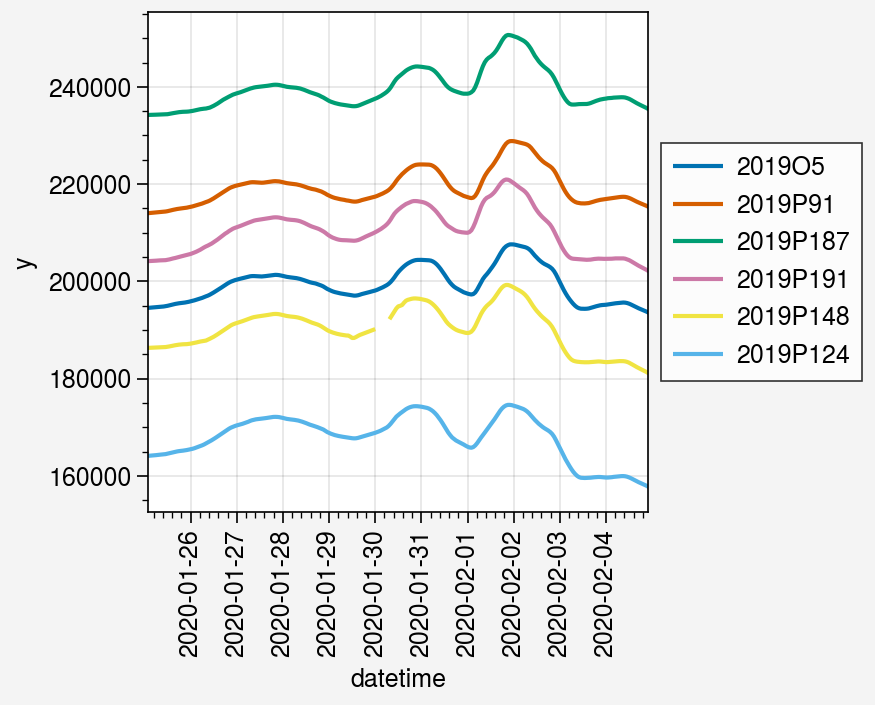

In [98]:
idx = 0
fig, ax = pplt.subplots()
for buoy in polygons['Full DN']:
    idx += 1
    ax.plot(buoy_data[buoy].y.resample('1H').asfreq()*1 + idx, label=buoy)
ax.legend(loc='r', ncols=1)

Left 1 40.0 km
Left 2 71.0 km
Left 3 46.0 km
Full DN 58.0 km
l_sites 18.0 km


/var/folders/ll/n11_xyw94n53r6mpnl4p0bqh0000gn/T/ipykernel_73326/2564826820.py:13: RuntimeWarning: invalid value encountered in double_scalars
  print(set_name, np.round(strain_rates[set_name].area.loc[ts].mean()**0.5/1e3), 'km')


North group nan km


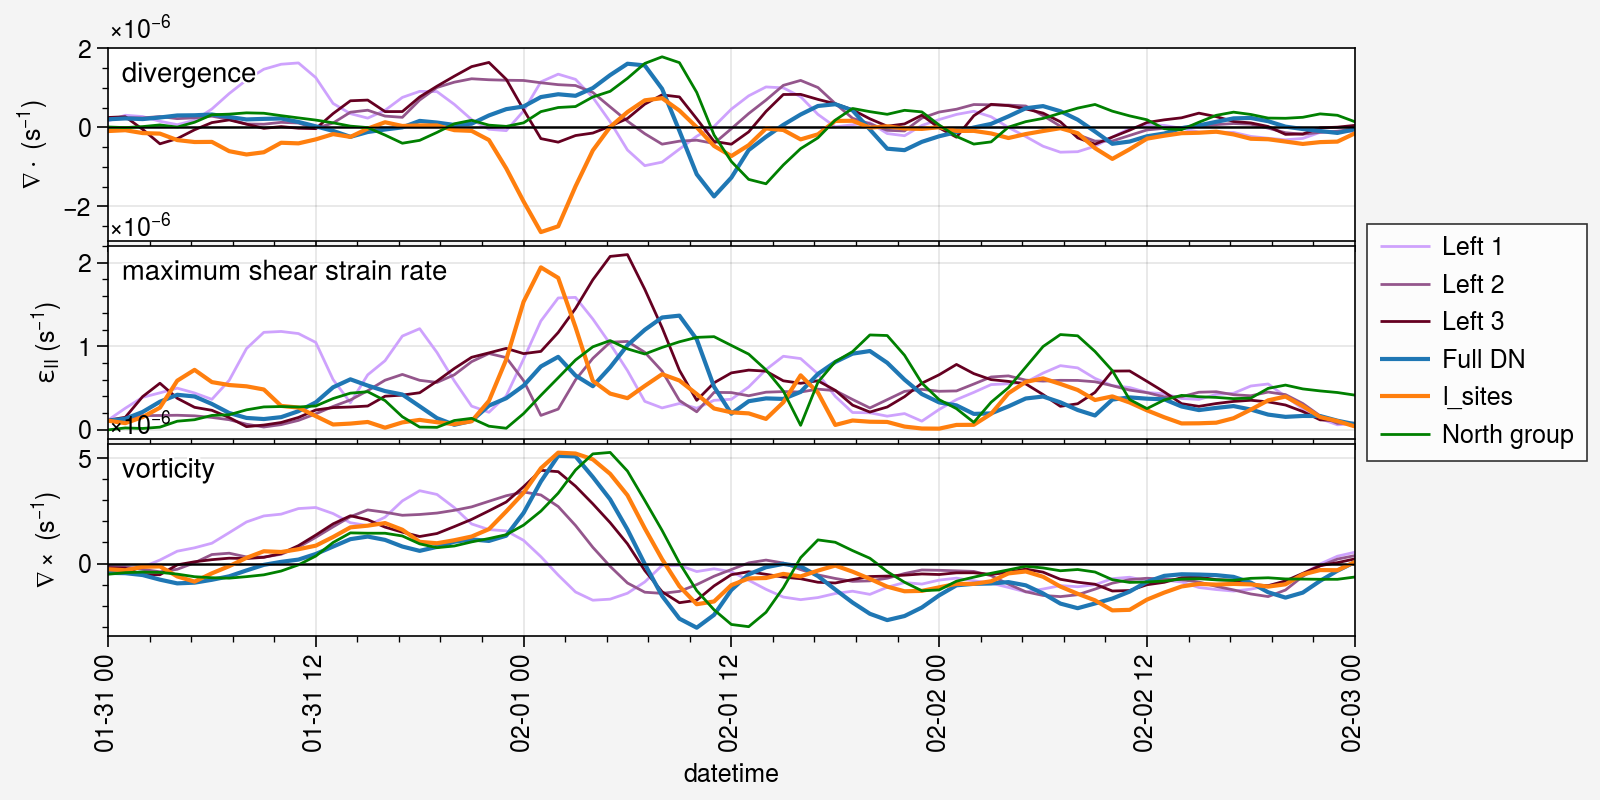

In [140]:
ts = slice('2020-01-31 00:00', '2020-02-03 00:00')
fig, ax = pplt.subplots(width=8, height=4, hspace=0.2, nrows=3, sharey=False)
for set_name in ['Left 1', 'Left 2', 'Left 3', 'Full DN', 'l_sites', 'North group']:
    if set_name[0] == 'D':
        lw = 1
        label = ''
    else:
        lw = 1
        label = set_name
    if set_name in ['Full DN', 'l_sites']:
        lw = 1.5
        
    print(set_name, np.round(strain_rates[set_name].area.loc[ts].mean()**0.5/1e3), 'km')
    ax[0].plot(strain_rates[set_name].divergence.loc[ts], color=colors[set_name], lw=lw, label=label)
    ax[1].plot(strain_rates[set_name].maximum_shear_strain_rate.loc[ts], color=colors[set_name], lw=lw, label=label)    
    ax[2].plot(strain_rates[set_name].vorticity.loc[ts], color=colors[set_name], lw=lw, label=label)        
    ax[0].axhline(0, color='k', lw=0.5) 
    ax[2].axhline(0, color='k', lw=0.5)
    ax[0].format(ultitle='divergence', ylabel='$\\nabla \cdot \vec u$ (s$^{-1}$)')
    ax[1].format(ultitle='maximum shear strain rate', ylabel='$\epsilon_{II}$ (s$^{-1}$)')
    ax[2].format(ultitle='vorticity', ylabel='$\\nabla \\times \vec u$ (s$^{-1}$)')
ax[1].legend(loc='r', ncols=1)
fig.save('../figures/strain_rates_left.jpg', dpi=300)

Full DN 58.0 km
l_sites 18.0 km
DN_set_1 28.0 km
DN_set_2 33.0 km
DN_set_3 31.0 km
DN_set_4 30.0 km
DN_set_5 19.0 km


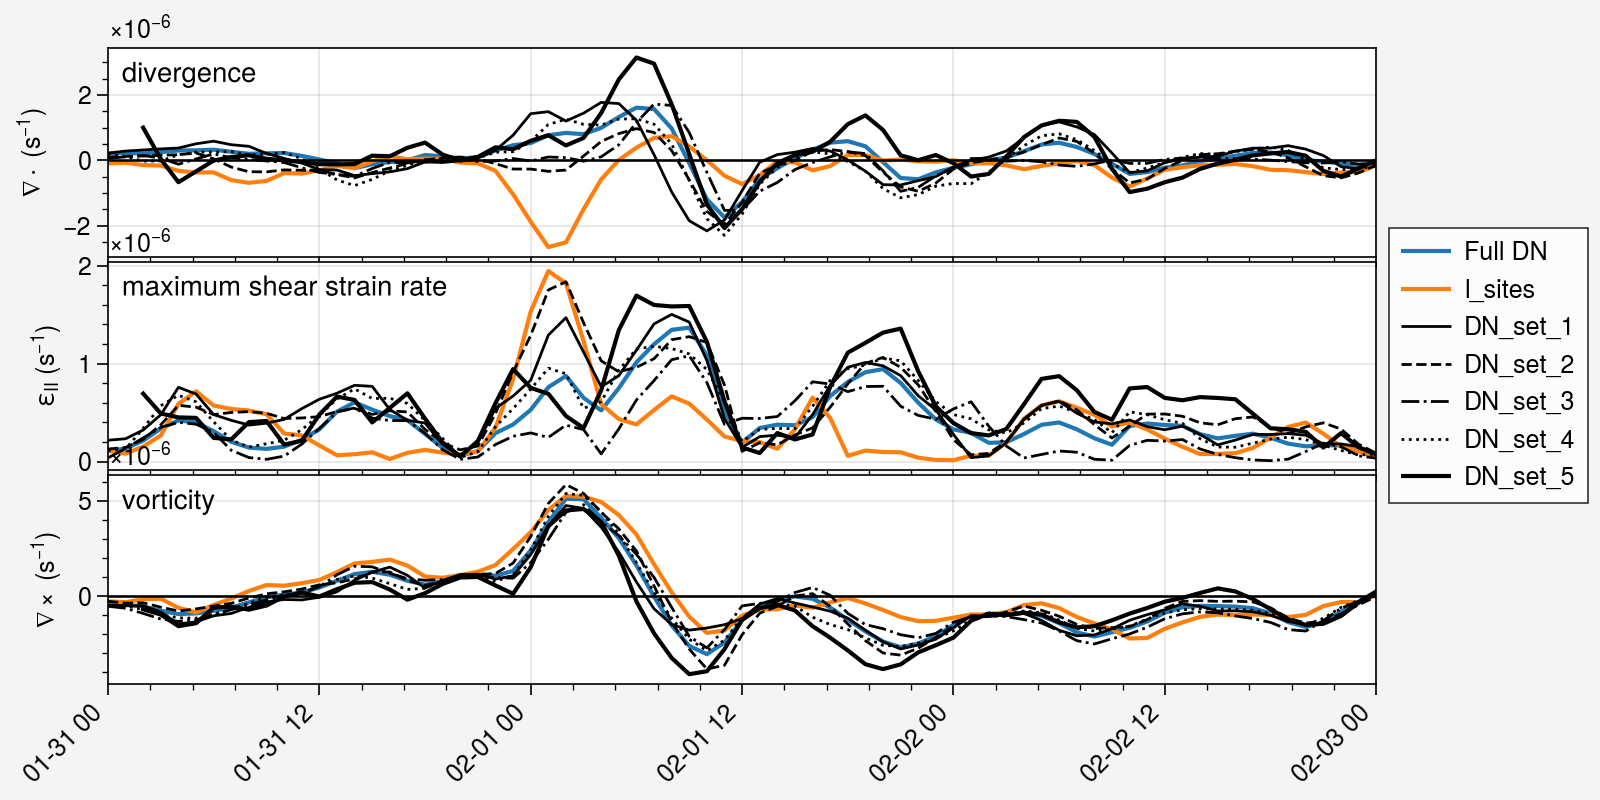

In [141]:
ts = slice('2020-01-31 00:00', '2020-02-03 00:00')
fig, ax = pplt.subplots(width=8, height=4, hspace=0.2, nrows=3, sharey=False)
for set_name in ['Full DN', 'l_sites', 'DN_set_1', 'DN_set_2', 'DN_set_3', 'DN_set_4', 'DN_set_5']:
    if set_name[0] == 'D':
        ls = lstyles[set_name]
        lw = 1
        label = set_name
    else:
        ls = '-'
        lw = 1
        label = set_name
    if set_name in ['Full DN', 'l_sites', 'DN_set_5']:
        lw = 1.5

        
    print(set_name, np.round(strain_rates[set_name].area.loc[ts].mean()**0.5/1e3), 'km')
    ax[0].plot(strain_rates[set_name].divergence.loc[ts], color=colors[set_name], ls=ls, lw=lw, label=label)
    ax[1].plot(strain_rates[set_name].maximum_shear_strain_rate.loc[ts], ls=ls, color=colors[set_name], lw=lw, label=label)    
    ax[2].plot(strain_rates[set_name].vorticity.loc[ts], color=colors[set_name], ls=ls, lw=lw, label=label)        
    ax[0].axhline(0, color='k', lw=0.5) 
    ax[2].axhline(0, color='k', lw=0.5)
    ax[0].format(ultitle='divergence', ylabel='$\\nabla \cdot \vec u$ (s$^{-1}$)')
    ax[1].format(ultitle='maximum shear strain rate', ylabel='$\epsilon_{II}$ (s$^{-1}$)')
    ax[2].format(ultitle='vorticity', ylabel='$\\nabla \\times \vec u$ (s$^{-1}$)')
ax[1].legend(loc='r', ncols=1)
ax.format(xrotation=45, xlabel='')
fig.save('../figures/strain_rates_DN.jpg', dpi=300)

basic checks: how does it compare to jenny's computation?

In [142]:
df_l = pd.read_csv('../data/UsingAngelav2Tracks/strainrate_MOSAiC_DN_fulldrift_Ltriangle.csv')

In [165]:
def convert_factor(x):
    try:
        return float(x)
    except:
        return np.nan
deformation_data_source = '../data/UsingAngelav2DanielCleanedInterpolatedTracks/'  
deformation_data = {}
prefix = 'strainrate_MOSAiC_DN_fulldrift_'


files = os.listdir(deformation_data_source)
for file in files:
    node = file.split('_')[-1]
    if node.split('.')[-1] != 'csv':
        pass
    else:
        node = node.replace('.csv', '')
        data = pd.read_csv(deformation_data_source + prefix + node + '.csv')
        data.columns = [x.strip() for x in data.columns]
        data['datetime'] = pd.to_datetime('2019-10-04 00:00') + pd.to_timedelta(data.day.values, unit='D')
        data['shape factor'] = [convert_factor(x) for x in data['shape factor']]
        data.set_index('datetime', inplace=True)
        deformation_data[node] = data #.loc[slice('2020-01-25', '2020-02-05')].copy()





In [150]:
deformation_data.keys()

dict_keys(['s53', 'blue', 's52', 's46', 's50', 's44', 's45', 's51', 's55', 's41', 's40', 's54', 's42', 's56', 's57', 's43', 's24', 's30', 's18', 'orange', 's19', 's31', 's25', 's33', 's27', 's26', 's32', 'Ltriangle', 's36', 's22', 's23', 's37', 's09', 's21', 's35', 'green', 's34', 's20', 's08', 's05', 's11', 's39', 'yellow', 's38', 's10', 's04', 's12', 's06', 's07', 's13', 's17', 's03', 's02', 's16', 's28', 's14', 's15', 's01', 's29', 's58'])

<a list of 1 Line2D objects>

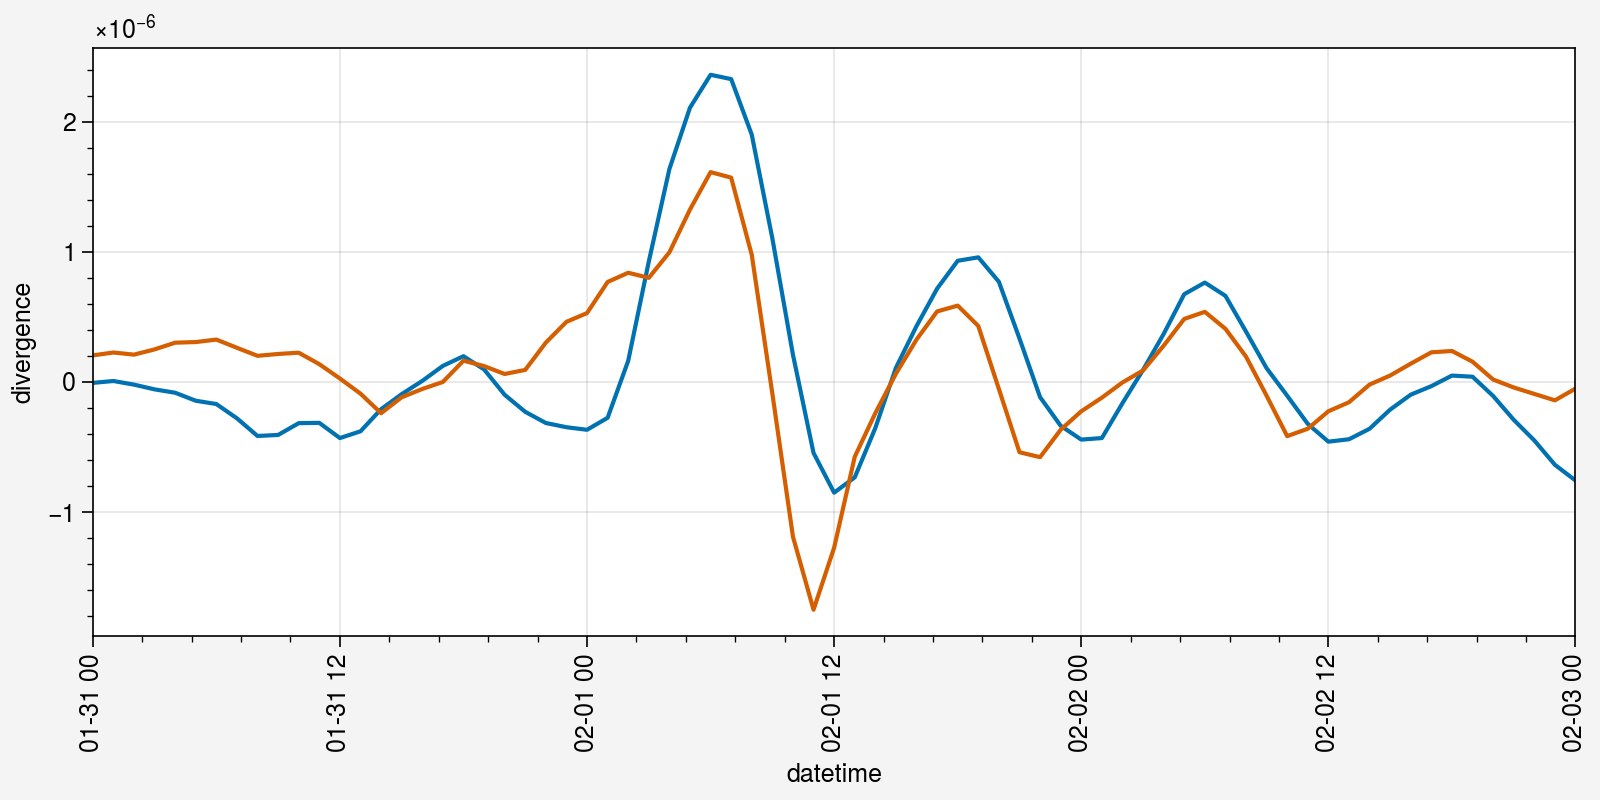

In [166]:
fig, ax = pplt.subplots(width=8, height=4)
ax.plot(deformation_data['yellow'].loc[ts, 'divergence'])
ax.plot(strain_rates['Full DN'].loc[ts, 'divergence'])

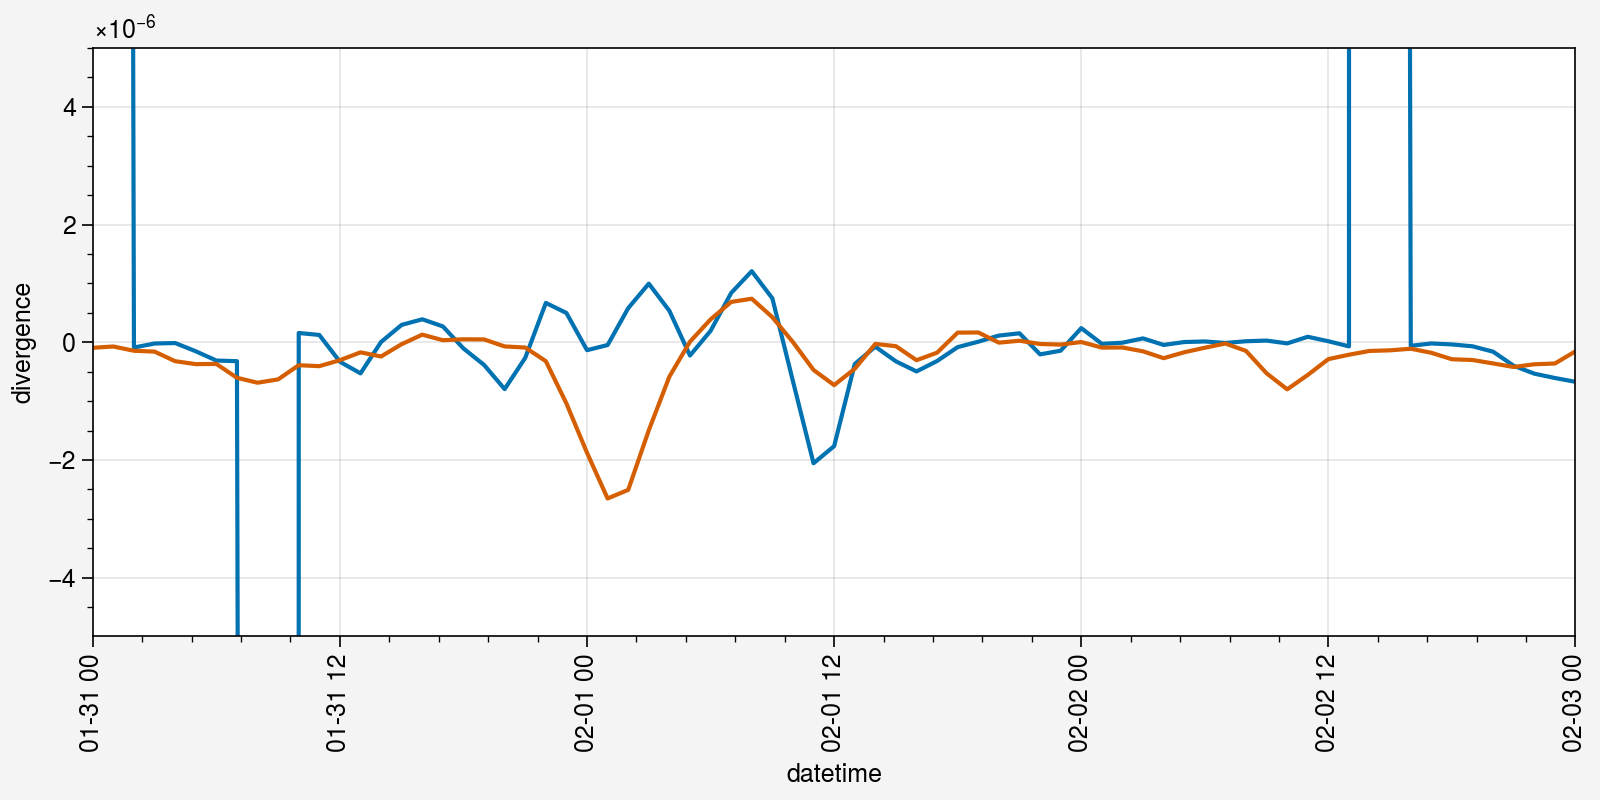

In [173]:
fig, ax = pplt.subplots(width=8, height=4)
ax.plot(deformation_data['blue'].loc[ts, 'divergence'])
ax.plot(strain_rates['l_sites'].loc[ts, 'divergence'])
ax.format(ylim=(-0.5e-5, 0.5e-5))

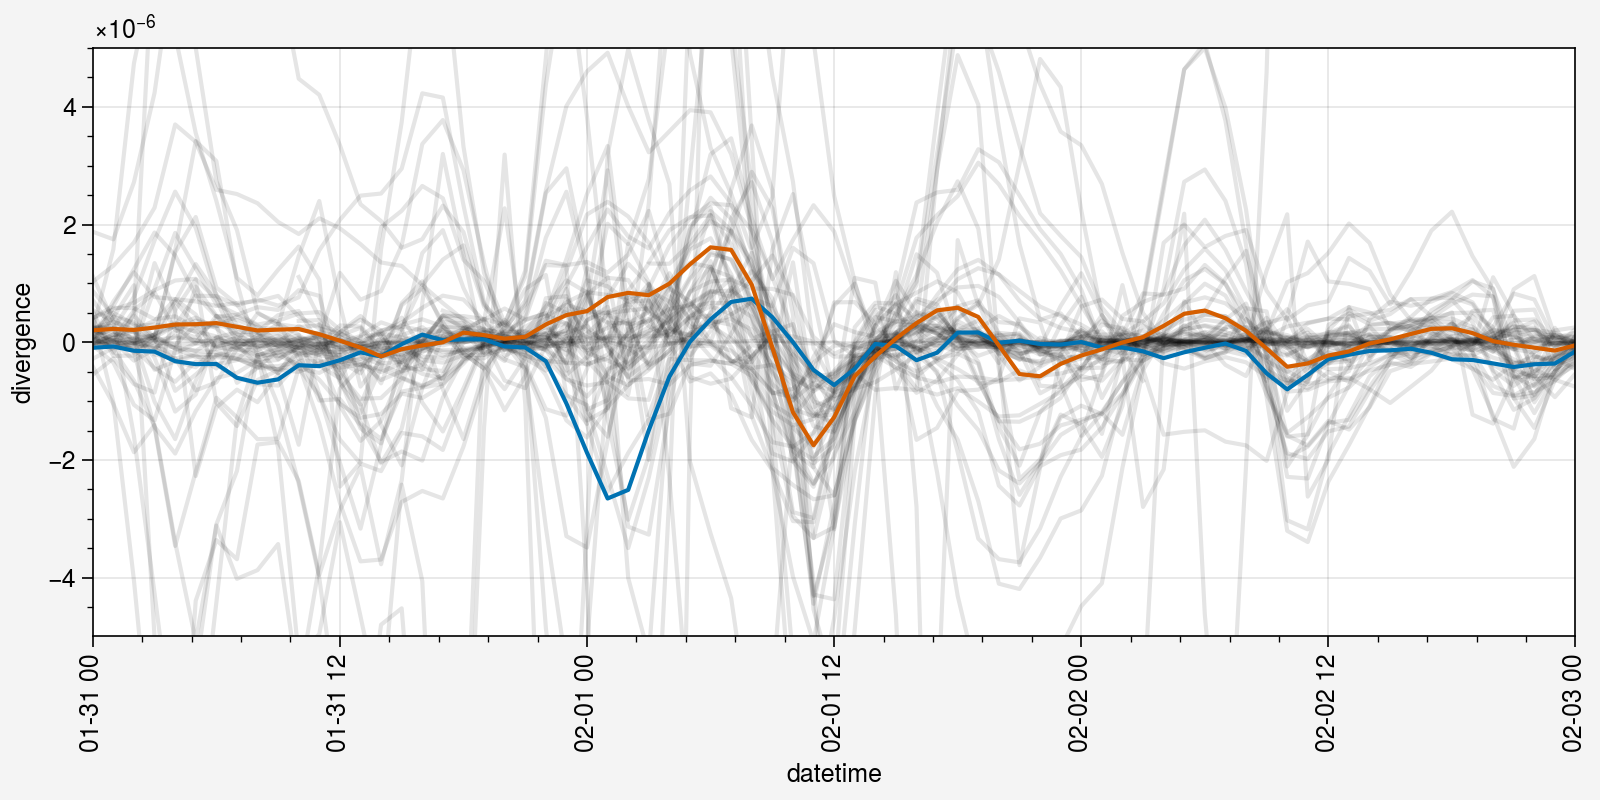

In [176]:
fig, ax = pplt.subplots(width=8, height=4)
for site in deformation_data:
    jdf = deformation_data[site].loc[ts]
    jdf = jdf.where(jdf.flag == 0)
    ax.plot(jdf['divergence'], color='k', alpha=0.1)
ax.plot(strain_rates['l_sites'].loc[ts, 'divergence'])
ax.plot(strain_rates['Full DN'].loc[ts, 'divergence'])
ax.format(ylim=(-0.5e-5, 0.5e-5))

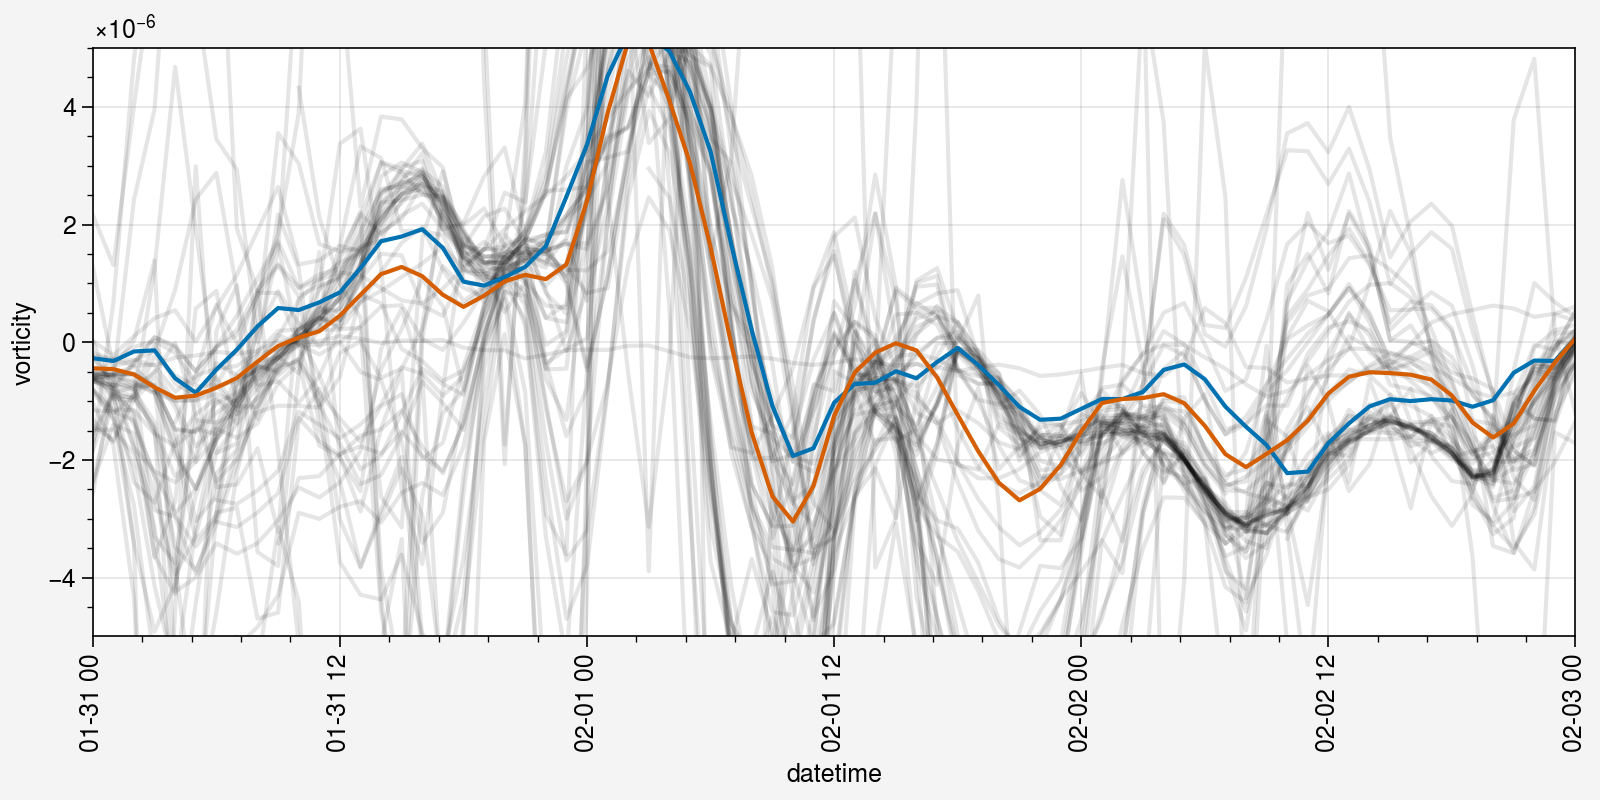

In [179]:
fig, ax = pplt.subplots(width=8, height=4)
for site in deformation_data:
    jdf = deformation_data[site].loc[ts]
    jdf = jdf.where(jdf.flag == 0)
    ax.plot(-jdf['vorticity'], color='k', alpha=0.1)
ax.plot(strain_rates['l_sites'].loc[ts, 'vorticity'])
ax.plot(strain_rates['Full DN'].loc[ts, 'vorticity'])
ax.format(ylim=(-0.5e-5, 0.5e-5))

In [51]:
# Checking buoys: what buoy is close to the doubled buoy?
# 2019P125 is used in 3 arrays, find replacements
dist = np.sqrt((df_x.loc[date,:] - df_x.loc[date, '2019P124'])**2 + \
               (df_y.loc[date,:] - df_y.loc[date, '2019P124'])**2)
dist.sort_values()


2019P124      0.000000
2019P122      8.972560
2019P203     20.265921
2019P198     21.247673
2019P90      23.908937
               ...    
2019P123    173.566699
2019P113    174.041335
2019P155    183.652796
2019P156    405.627558
2019P157    506.826896
Name: 2020-02-01 00:00:00, Length: 69, dtype: float64

<AxesSubplot:xlabel='datetime'>

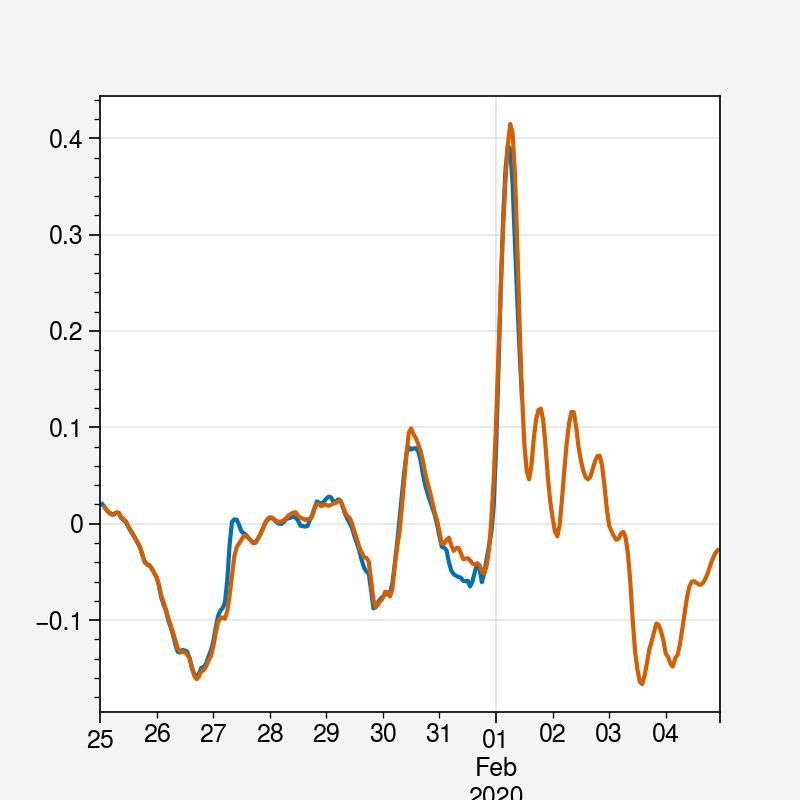

In [52]:
buoy_data['2019P122'].u.plot()
buoy_data['2019P90'].u.plot()

In [13]:
# Another option for 
lines = {'a': '2020-01-31 17:00:00', # Distant group
         'b': '2020-02-01 01:00:00', # Left group
         'c': '2020-02-01 06:00:00', # L-sites and Right Group
         'd': '2020-02-01 10:00:00', # 2019P22 (Ahead)
    }

In [6]:
# Left, right, distant, l_sites, ahead
ahead = ['2019P22']

In [17]:
ts = slice('2020-01-31 00:00', '2020-02-02 00:00')
for buoy in ahead:
    print(buoy_data[buoy].loc[ts, 'speed'].idxmax())

2020-02-01 10:00:00


,x_stere,y_stere,data_gap_minutes,longitude,latitude,x,y,u,v,speed
datetime,,,,,,,,,,
2020-01-25 01:00:00,188717.448291,206798.934895,30.0,92.61752,87.41599,188717.448291,206798.934895,NaN,NaN,NaN
2020-01-25 02:00:00,188799.716421,206822.160811,30.0,92.60829,87.41532,188799.716421,206822.160811,0.022265,0.006579,0.023217
2020-01-25 03:00:00,188877.755497,206846.303298,30.0,92.59983,87.41467,188877.755497,206846.303298,0.020508,0.008181,0.022080
2020-01-25 04:00:00,188947.374438,206881.063801,30.0,92.59411,87.41400,188947.374438,206881.063801,0.018598,0.007069,0.019896
2020-01-25 05:00:00,189011.662158,206897.203483,30.0,92.58663,87.41349,189011.662158,206897.203483,0.016818,0.004209,0.017337
...,...,...,...,...,...,...,...,...,...,...
2020-02-04 19:00:00,173394.630220,207288.309314,30.0,95.08785,87.50564,173394.630220,207288.309314,-0.038931,-0.050641,0.063876
2020-02-04 20:00:00,173267.246772,207102.384778,30.0,95.08327,87.50771,173267.246772,207102.384778,-0.032641,-0.052568,0.061877
2020-02-04 21:00:00,173159.618187,206909.819065,30.0,95.07456,87.50971,173159.618187,206909.819065,-0.027360,-0.057186,0.063394
